<a href="https://colab.research.google.com/github/unnimaya-vu/unnimaya-vu/blob/main/regmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
df.shape

(50, 5)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
df['State'].value_counts()#df.groupby('State')['State'].count()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
x=df.iloc[:,:-1]
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [ ]:
y=df.iloc[:,-1]
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

<Axes: xlabel='State', ylabel='count'>

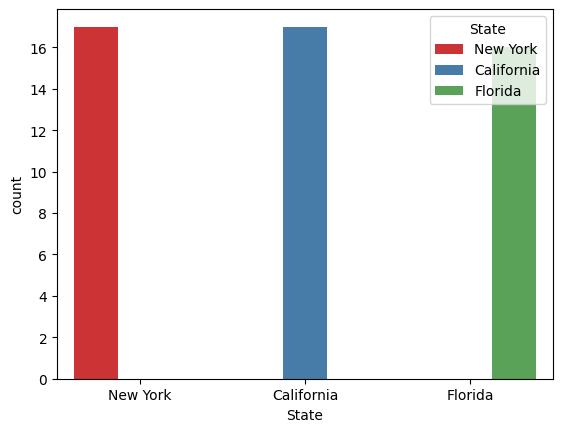

In [ ]:
sns.countplot(x=df['State'],hue=df['State'],palette='Set1')

In [ ]:
state_count=df['State'].value_counts()
state_count

New York      17
California    17
Florida       16
Name: State, dtype: int64

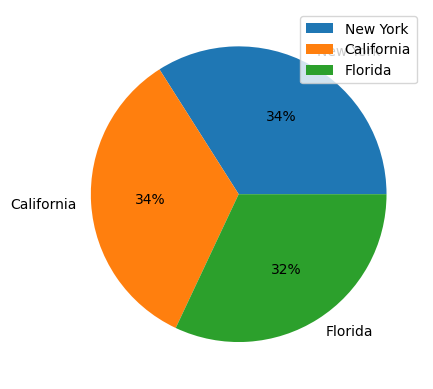

In [ ]:
plt.pie(state_count,labels=state_count.index,autopct='%.f%%')
plt.legend()

<Axes: xlabel='R&D Spend', ylabel='Profit'>

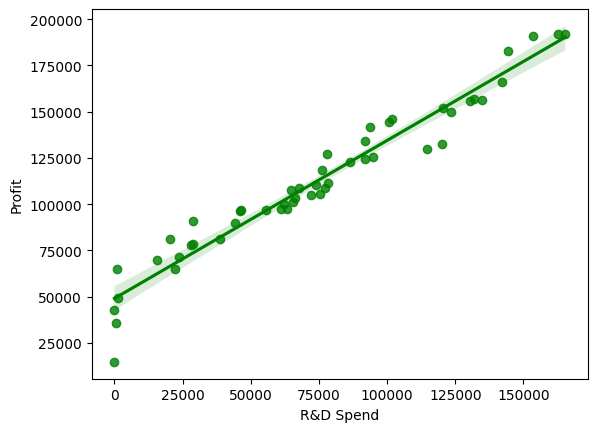

In [ ]:
sns.regplot(x=df['R&D Spend'],y=df['Profit'],color='g')

<Axes: xlabel='Administration', ylabel='Profit'>

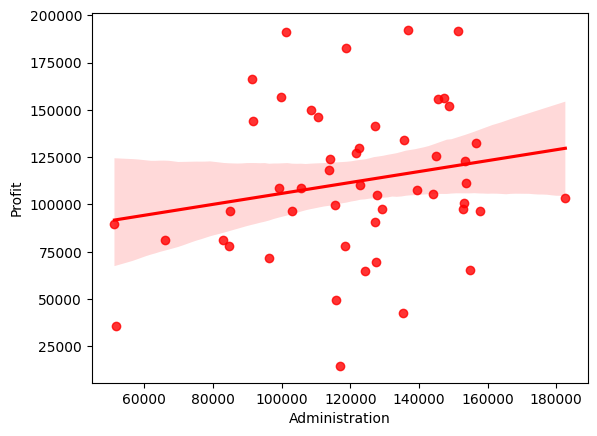

In [ ]:
sns.regplot(x=df['Administration'],y=df['Profit'],color='r')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

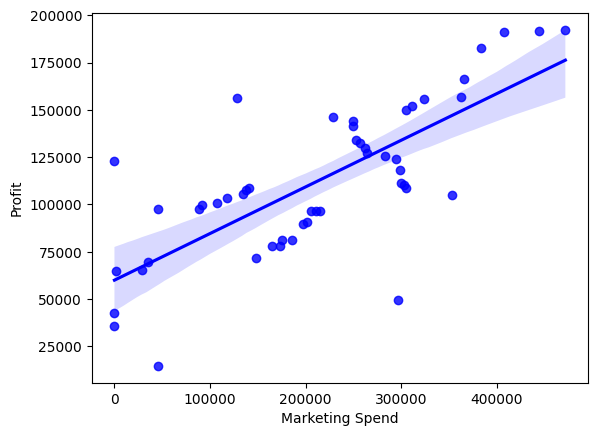

In [ ]:
sns.regplot(x=df['Marketing Spend'],y=df['Profit'],color='blue')

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
one=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['State']),remainder='passthrough')
x=one.fit_transform(x)
x


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=42)
x_train

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.7892920e+04,
        8.4710770e+04, 1.6447071e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3154600e+03,
        1.1581621e+05, 2.9711446e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.3542692e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1452361e+05,
        1.2261684e+05, 2.6177623e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2333488e+05,
        1.0867917e+05, 3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.8013110e+04,
        1.2159755e+05, 2.6434606e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 7.7044010e+04,
        9.9281340e+04, 1.4057481e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6426070e+04,
        1.5769392e+05, 2.1079767e+05],
       [0.0000000e+00, 0.0000000e+00,

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([126187.39411505,  85788.82259512,  99777.02815178,  45706.12238329,
       127062.20722772,  51891.83884459, 109114.62977495, 100600.61123702,
        97953.99874716, 111730.5770681 , 128818.49200668, 174195.35772631,
        93736.28538438, 148381.0409716 , 172313.87139388])

In [ ]:
print('slope is',model.coef_)
list(zip(x,model.coef_))

slope is [ 2.59028652e+02  7.17099427e+02 -9.76128080e+02  8.04937292e-01
 -9.12577104e-02  2.80672826e-02]


[(array([0.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
         1.368978e+05, 4.717841e+05]),
  259.02865230435845),
 (array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
         1.5137759e+05, 4.4389853e+05]),
  717.0994272260168),
 (array([0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
         1.0114555e+05, 4.0793454e+05]),
  -976.1280795283882),
 (array([0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
         1.1867185e+05, 3.8319962e+05]),
  0.8049372918010818),
 (array([0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
         9.1391770e+04, 3.6616842e+05]),
  -0.09125771038939234),
 (array([0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
         9.9814710e+04, 3.6286136e+05]),
  0.028067282565302776)]

In [ ]:
print('Constant is',model.intercept_)

Constant is 57153.612062430875


In [ ]:
df1=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
df1

,Actual value,Predicted value,Difference
13,134307.35,126187.394115,8119.955885
39,81005.76,85788.822595,-4783.062595
30,99937.59,99777.028152,160.561848
45,64926.08,45706.122383,19219.957617
17,125370.37,127062.207228,-1691.837228
48,35673.41,51891.838845,-16218.428845
26,105733.54,109114.629775,-3381.089775
25,107404.34,100600.611237,6803.728763
32,97427.84,97953.998747,-526.158747
19,122776.86,111730.577068,11046.282932


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred))

Percentage error is 0.08929865344172414


In [ ]:
from sklearn.metrics import r2_score
print("R2_score is ",r2_score(y_test,y_pred))

R2_score is  0.9397108063356046
